## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

* df_emp -> hold **employee_data**
* df_insu -> hold **insurance_data**
* df_ven -> hold **vendor_data**

In [2]:
df_emp=pd.read_csv("/kaggle/input/insurance-data/employee_data.csv")
df_insu=pd.read_csv("/kaggle/input/insurance-data/insurance_data.csv")
df_ven=pd.read_csv("/kaggle/input/insurance-data/vendor_data.csv")

In [3]:
df_emp.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134


In [4]:
df_insu.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [5]:
df_ven.head()

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,NaN,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,NaN,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,NaN,Nashville,TN,37210


In [6]:
print(df_insu.shape)
print(df_emp.shape)
print(df_ven.shape)

(10000, 38)
(1200, 10)
(600, 7)


# Task 1

## Merge Dataframes
* df - hold all Info realted to **customers (with Transation deatils)** and their **agent ID**
* df2 - hold all Info realted to **customers (with Transation deatils)** and their **vendor ID**

In [7]:
df=pd.merge(df_insu,df_emp,on='AGENT_ID',how='left')   #customer and agents info
df2=pd.merge(df_insu,df_ven,on='VENDOR_ID',how='left')  #customer and thier claim vendor info

In [8]:
df.shape

(10000, 47)

In [9]:
df2.shape

(10000, 44)

In [10]:
df.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1_x',
       'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER'],
      dtype='object')

In [11]:
df2.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1_x',
       'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'VENDOR_NAME', 'ADDRESS_LINE1_y',
       'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y', 'POSTAL_CODE_y'],
      dtype='object')

In [12]:
print(len(df['CUSTOMER_ID'].unique()))
print(len(df_emp['AGENT_ID'].unique()))
print(len(df_ven['VENDOR_ID'].unique()))

10000
1200
600


### conclusion
* There are total **1200** Agents
* There are total **10000** types of Customers 
* There are total **600** Vendors 

In [13]:
df['CLAIM_STATUS'].value_counts()

A    9497
D     503
Name: CLAIM_STATUS, dtype: int64

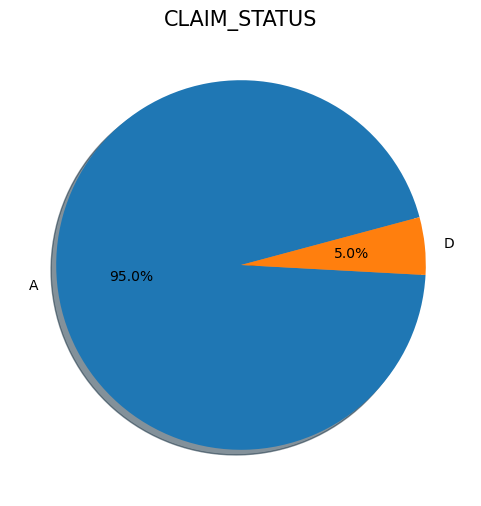

In [14]:
plt.figure(figsize=(6,6))
labels =df['CLAIM_STATUS'].value_counts(sort = True).index
sizes = df['CLAIM_STATUS'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=15)
plt.title('CLAIM_STATUS',size = 15)
plt.show()

### conclusion
* Out of all claims **95% of claims** are **successfully approved**  

# Task 2

In [15]:
df_insu.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID'],
      dtype='object')

In [16]:
df_insu['INSURANCE_TYPE'].value_counts()

Property    1692
Mobile      1692
Health      1690
Life        1682
Travel      1670
Motor       1574
Name: INSURANCE_TYPE, dtype: int64

In [17]:
df_insu['INSURANCE_TYPE'].value_counts()[:3]

Property    1692
Mobile      1692
Health      1690
Name: INSURANCE_TYPE, dtype: int64

In [18]:
df_insu[df_insu['CLAIM_STATUS']=='A']['INSURANCE_TYPE'].value_counts()

Property    1608
Mobile      1608
Health      1605
Life        1605
Travel      1582
Motor       1489
Name: INSURANCE_TYPE, dtype: int64

In [19]:
df.groupby('INSURANCE_TYPE')['CLAIM_AMOUNT'].agg(['min','mean','max']).round().T

INSURANCE_TYPE,Health,Life,Mobile,Motor,Property,Travel
min,1000.0,10000.0,100.0,1000.0,10000.0,1000.0
mean,10801.0,54386.0,407.0,5504.0,24574.0,2980.0
max,20000.0,100000.0,700.0,10000.0,40000.0,5000.0


In [20]:
df.groupby(['INSURANCE_TYPE','POLICY_NUMBER'])['CLAIM_AMOUNT'].agg(['min','mean','max'])

min     mean    max
INSURANCE_TYPE POLICY_NUMBER                       
Health         PLC00000002    10000  10000.0  10000
               PLC00000005    17000  17000.0  17000
               PLC00000015     3000   3000.0   3000
               PLC00000017     4000   4000.0   4000
               PLC00000019     7000   7000.0   7000
...                             ...      ...    ...
Travel         PLC00009978     5000   5000.0   5000
               PLC00009982     2000   2000.0   2000
               PLC00009986     2000   2000.0   2000
               PLC00009989     2000   2000.0   2000
               PLC00009996     3000   3000.0   3000

[10000 rows x 3 columns]

### conclusion
*  **Property, Mobile, Health, Life** will hvae high priority
* claim amount for **Life** is very high i.e **Avg -55k**
* claim amount for **Mobile** is very low i.e **Avg -400**
* claim amount for **Travel** is also low i.e **Avg -3k**

# Task 3

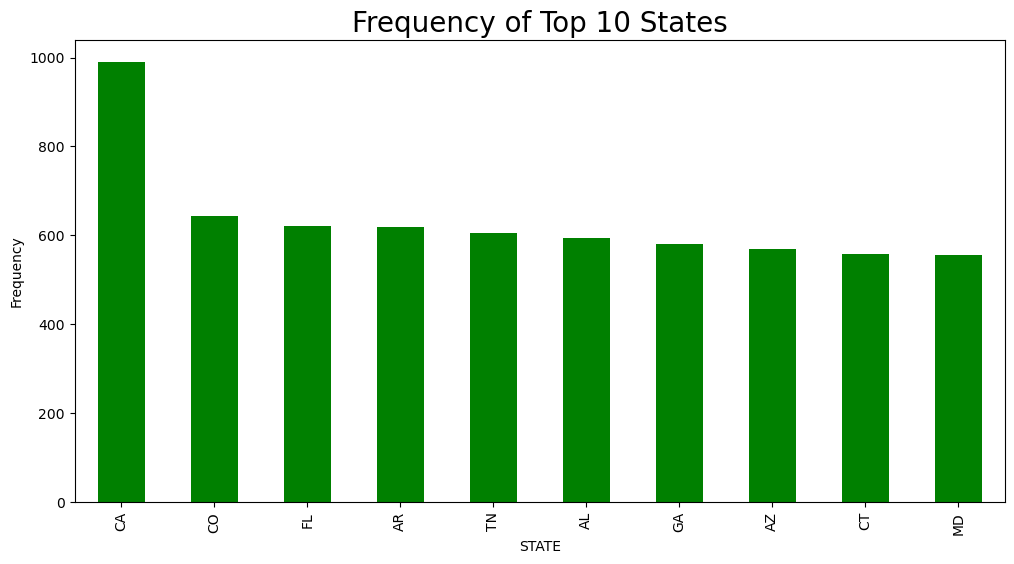

In [21]:
df_insu[df_insu['CLAIM_STATUS']=='A']['STATE'].value_counts(ascending=False)[:10].plot(kind='bar',color="green",figsize=(12,6))
plt.xlabel("STATE")
plt.ylabel("Frequency")
plt.title("Frequency of Top 10 States",size=20)
plt.show()

In [22]:
df_insu['STATE'].value_counts(ascending=False)

CA    1035
CO     677
FL     650
AR     644
TN     641
AL     623
GA     613
AZ     603
CT     594
KY     581
DC     581
VT     579
MD     576
MA     549
OK     531
AK     523
Name: STATE, dtype: int64

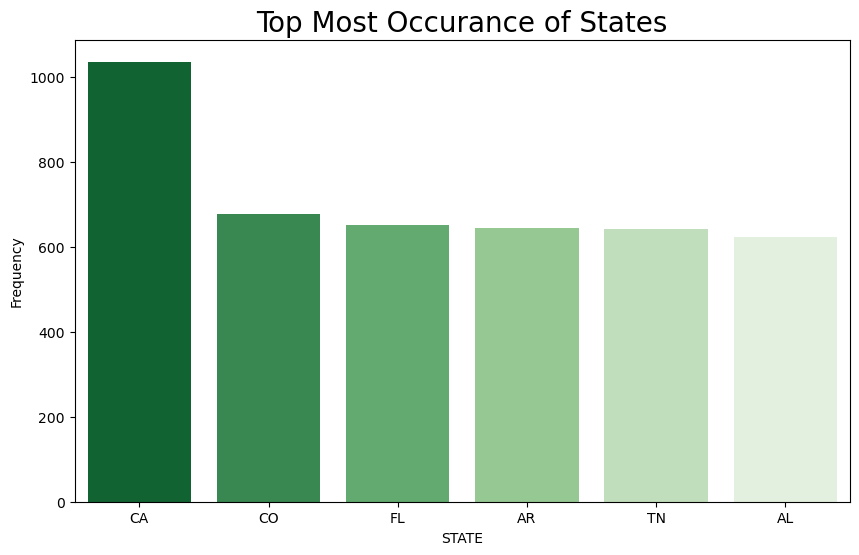

In [23]:
most_state=df_insu['STATE'].value_counts(ascending=False)[:6]
plt.figure(figsize=(10,6))
sns.barplot(x=most_state.index,y=most_state,palette='Greens_r')
plt.xlabel("STATE")
plt.ylabel("Frequency")
plt.title("Top Most Occurance of States",size=20)
plt.show()

### conclusion
* There are total around **1100 claims** were got from **CA** state which was **very high as compare to all**
* Also **other TOP states** inclues **CO, FL, AR, TN and AL** have an on avg claims was **600-700**

# Task 4

* Business wants to create a new variable “COLOCATION” which will have following values IF
* Customer State == Incident State == Agent Address State THEN 1 ELSE 0

* state_x -- states of customer(insu data) 
* state_y -- states of agents(emp data)

In [24]:
df_temp=df[df['STATE_y']==df['INCIDENT_STATE']]
df_new=df_temp[df_temp['STATE_y']==df_temp['STATE_x']]

In [25]:
#index of all records having (Customer State == Incident State == Agent Address State)
df_new.index

Int64Index([ 645,  678,  919, 1266, 1301, 1475, 1491, 1731, 1846, 1930, 2255,
            2785, 2793, 3405, 3845, 3916, 4200, 4267, 4302, 4443, 5139, 5168,
            5225, 5342, 5388, 5568, 5582, 5929, 5999, 6340, 6559, 6857, 6887,
            7235, 7437, 7859, 7966, 8130, 8158, 8408, 8492, 9147, 9150, 9485],
           dtype='int64')

In [26]:
df['COLOCATION']=np.where(df.index.isin(list(df_new.index)),1,0)   

In [27]:
df[df['COLOCATION']==1].index

Int64Index([ 645,  678,  919, 1266, 1301, 1475, 1491, 1731, 1846, 1930, 2255,
            2785, 2793, 3405, 3845, 3916, 4200, 4267, 4302, 4443, 5139, 5168,
            5225, 5342, 5388, 5568, 5582, 5929, 5999, 6340, 6559, 6857, 6887,
            7235, 7437, 7859, 7966, 8130, 8158, 8408, 8492, 9147, 9150, 9485],
           dtype='int64')

In [28]:
df['COLOCATION'].value_counts()

0    9956
1      44
Name: COLOCATION, dtype: int64

In [29]:
df['COLOCATION'].mean()

0.0044

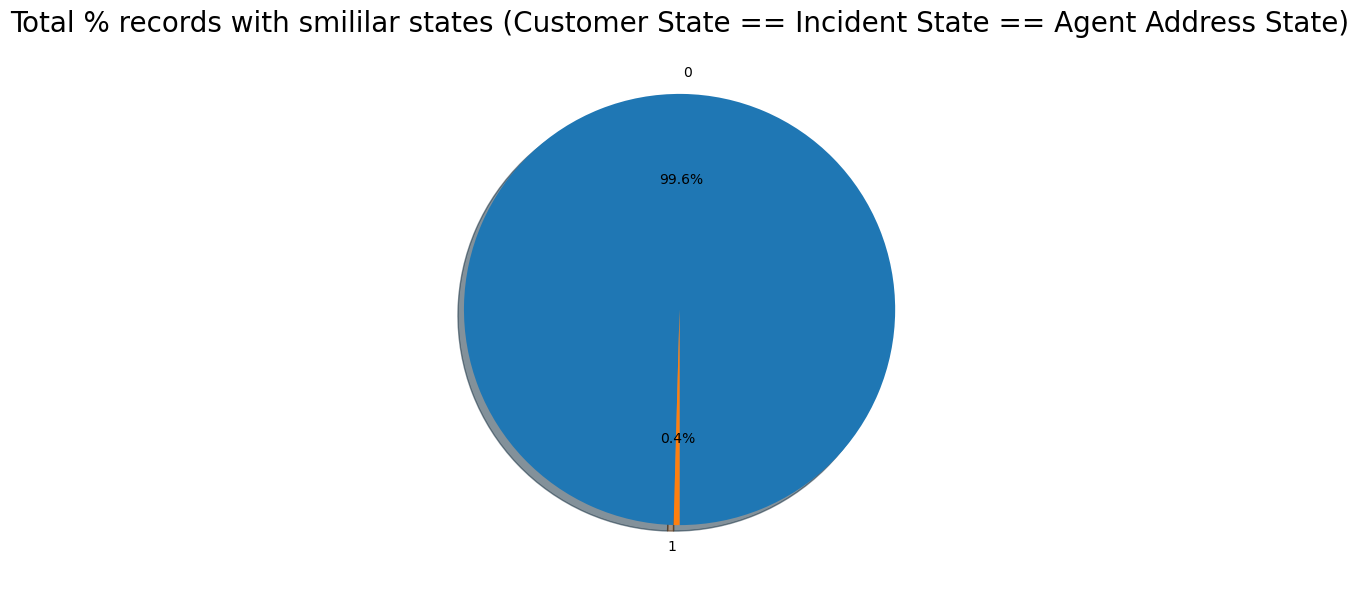

In [30]:
plt.figure(figsize=(7,7))
labels =df['COLOCATION'].value_counts(sort = True).index
sizes = df['COLOCATION'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % records with smililar states (Customer State == Incident State == Agent Address State)',size = 20)
plt.show()

### conclusion
* There are total only 4% records with smililar states (Customer State == Incident State == Agent Address State)**

# Task 5

* “AUTHORITY_CONTACTED” is NOT “Police” and POLICE_AVAILABLE == 1 Then Update “AUTHORITY_CONTACTED” to Police.

In [31]:
df['AUTHORITY_CONTACTED'].value_counts()

Ambulance    4082
Police       2982
None         1945
Other         991
Name: AUTHORITY_CONTACTED, dtype: int64

In [32]:
df['POLICE_REPORT_AVAILABLE'].value_counts()

1    6928
0    3072
Name: POLICE_REPORT_AVAILABLE, dtype: int64

In [33]:
df[df['CLAIM_STATUS']=='A']['AUTHORITY_CONTACTED'].value_counts()

Ambulance    3859
Police       2831
None         1856
Other         951
Name: AUTHORITY_CONTACTED, dtype: int64

In [34]:
df[df['POLICE_REPORT_AVAILABLE']==1].index

Int64Index([   0,    2,    4,    5,    6,    7,    8,   10,   11,   12,
            ...
            9984, 9987, 9988, 9990, 9991, 9992, 9993, 9995, 9997, 9998],
           dtype='int64', length=6928)

In [35]:
df[df['POLICE_REPORT_AVAILABLE']==0]['AUTHORITY_CONTACTED'].value_counts()

Ambulance    1261
Police        924
None          578
Other         309
Name: AUTHORITY_CONTACTED, dtype: int64

In [36]:
df.loc[df[df['POLICE_REPORT_AVAILABLE']==1].index,'AUTHORITY_CONTACTED']='Police'

In [37]:
df.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1_x',
       'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'COLOCATION'],
      dtype='object')

## EDA

In [38]:
df.describe()[['CLAIM_AMOUNT','PREMIUM_AMOUNT','AGE','NO_OF_FAMILY_MEMBERS','TENURE','ANY_INJURY']].style.background_gradient(cmap='gnuplot2_r').set_precision(2)

,CLAIM_AMOUNT,PREMIUM_AMOUNT,AGE,NO_OF_FAMILY_MEMBERS,TENURE,ANY_INJURY
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,16563.83,88.51,44.47,4.49,62.95,0.70
std,22037.49,48.32,11.52,1.71,32.89,0.46
min,100.00,6.00,25.00,2.00,6.00,0.00
25%,2000.00,62.02,34.00,3.00,34.00,0.00
50%,7000.00,88.84,45.00,4.00,64.00,1.00
75%,21000.00,121.90,54.00,6.00,92.00,1.00
max,100000.00,200.00,64.00,7.00,119.00,1.00


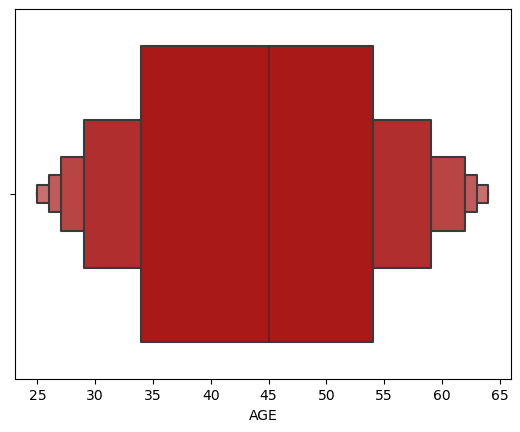

In [39]:
sns.boxenplot(data=df,x='AGE',palette='gist_heat')
plt.show()

### conclusion
* The **mojority customers** have **Age group between 35-55**
* **Average Age is 45**

In [40]:
df['NO_OF_FAMILY_MEMBERS'].value_counts()

2    1690
3    1683
7    1674
4    1667
5    1647
6    1639
Name: NO_OF_FAMILY_MEMBERS, dtype: int64

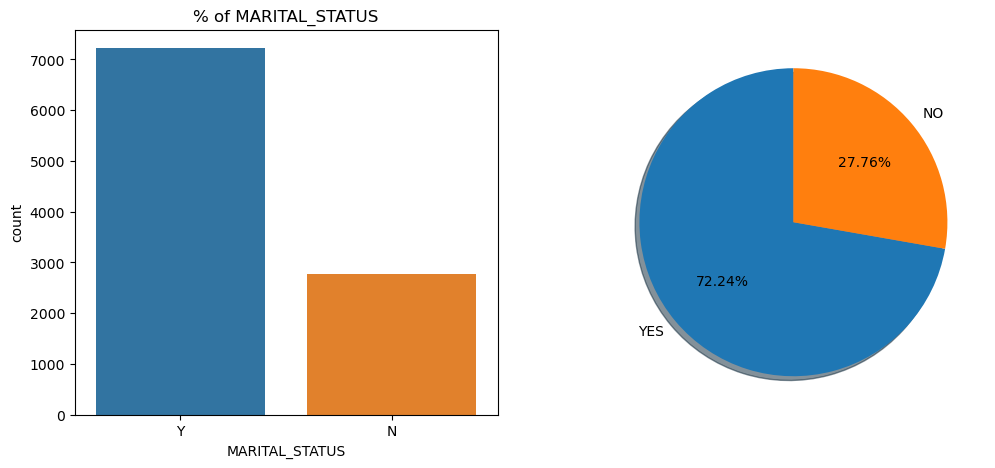

In [41]:
#Excited and Non Excited Customers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='MARITAL_STATUS',data=df)
plt.title("% of MARITAL_STATUS")
plt.subplot(1,2,2)
#labels =df['Exited'].value_counts(sort = True).index
sizes = df['MARITAL_STATUS'].value_counts(sort = True)
plt.pie(sizes,labels=["YES","NO"],autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

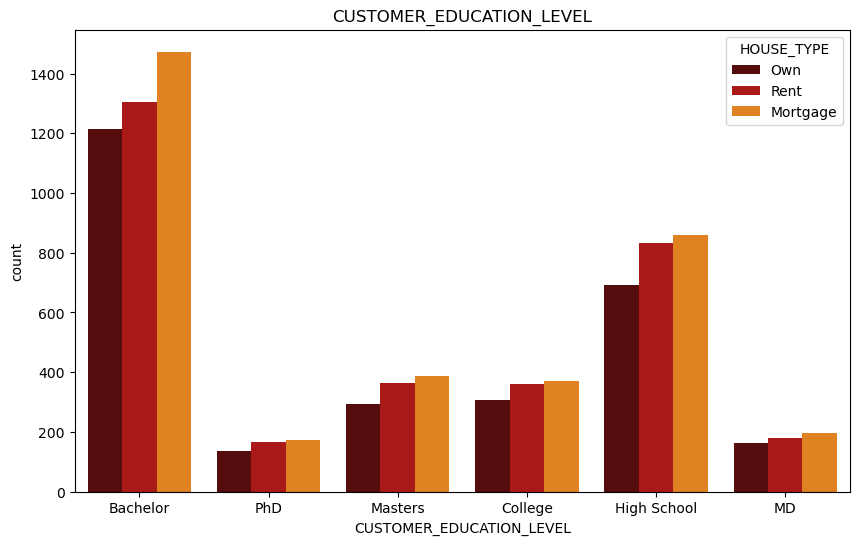

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='CUSTOMER_EDUCATION_LEVEL',palette='gist_heat',hue='HOUSE_TYPE')
plt.title("CUSTOMER_EDUCATION_LEVEL")
plt.show()

### conclusion
* The **People** with **Bachelor** Education background are **claim most**
* **MD, PHD and MSTER having very very less prob to claim for Insurance**

In [43]:
df.groupby(['CUSTOMER_EDUCATION_LEVEL'])['CLAIM_AMOUNT'].agg(['min','mean','max']).T.round(2)

CUSTOMER_EDUCATION_LEVEL,Bachelor,College,High School,MD,Masters,PhD
min,100.00,100.00,100.00,100.0,100.00,100.00
mean,16934.65,17022.71,16855.14,15196.1,15389.95,17089.92
max,100000.00,100000.00,100000.00,100000.0,100000.00,99000.00


In [44]:
df['CUSTOMER_EDUCATION_LEVEL'].value_counts()

Bachelor       3991
High School    2385
Masters        1045
College        1035
MD              539
PhD             476
Name: CUSTOMER_EDUCATION_LEVEL, dtype: int64

In [45]:
df.groupby(['AGENT_ID'])['CUSTOMER_ID'].count().sort_values(ascending=False)[:8]

AGENT_ID
AGENT00992    19
AGENT00319    18
AGENT00849    17
AGENT00388    17
AGENT01106    16
AGENT01097    16
AGENT00723    16
AGENT00204    15
Name: CUSTOMER_ID, dtype: int64

In [46]:
i=df.groupby(['AGENT_ID'])['CUSTOMER_ID'].count().sort_values(ascending=False)[:8].index
v=df.groupby(['AGENT_ID'])['CUSTOMER_ID'].count().sort_values(ascending=False)[:8].values

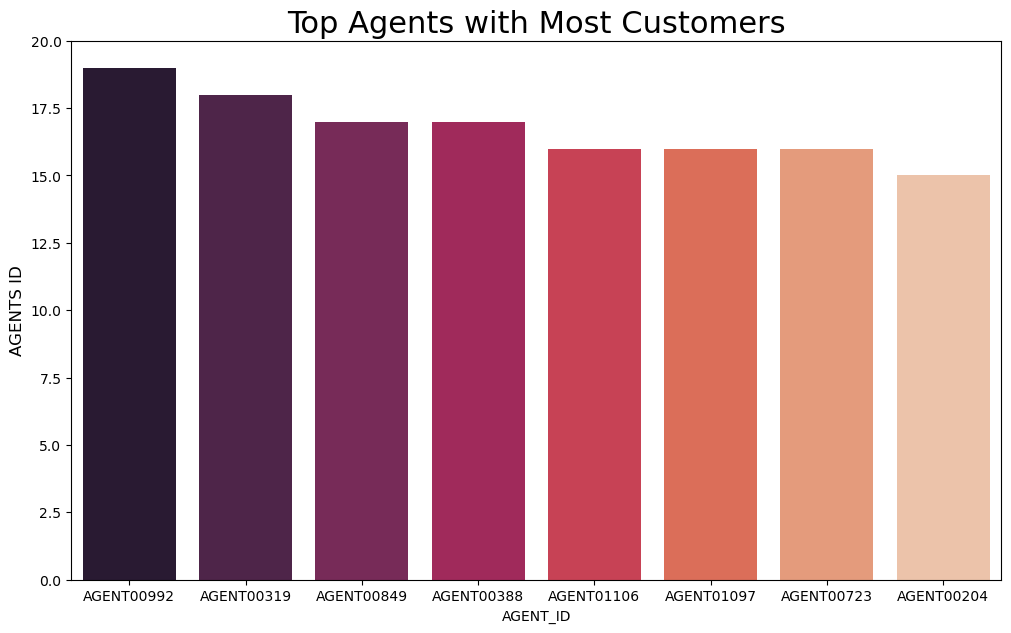

In [47]:
plt.figure(figsize=(12,7))
sns.barplot(y=v,x=i,palette='rocket')
plt.ylim(0,20)
plt.title("Top Agents with Most Customers",size=22)
plt.ylabel("No of Customers",size=12)
plt.ylabel("AGENTS ID",size=12)
plt.show()

### conclusion
* There are **7 Agents** having having thier **customer counts more than 15**
* Only single Agent AGENT00992 have customers 19 

# Task 6

* Business wants to check the Claim Amount for deviation for each transaction
* CLAIM_DEVIATION = AVG_CLAIM_AMOUNT_FOR_LAST_30DAYS (same insurance type) / CURRENT_CLAIM_AMOUNT

In [48]:
df_ro1=df.sort_values('REPORT_DT')

In [49]:
df_ro1['last_30Days_Avg_Claim_Amount']=df_ro1['CLAIM_AMOUNT'].rolling(30).mean().shift(1)
df_ro1['CLAIM_DEVIATION_']=df_ro1['last_30Days_Avg_Claim_Amount']/df_ro1['CLAIM_AMOUNT']

In [50]:
df_ro1[['last_30Days_Avg_Claim_Amount','CLAIM_DEVIATION_']]

,last_30Days_Avg_Claim_Amount,CLAIM_DEVIATION_
15,NaN,NaN
1,NaN,NaN
6,NaN,NaN
35,NaN,NaN
50,NaN,NaN
...,...,...
9956,17903.333333,0.688590
9979,18766.666667,1.042593
9966,18100.000000,0.646429
9986,19000.000000,63.333333


In [51]:
df_ro2=df_ro1[30:]
df_ro2[['last_30Days_Avg_Claim_Amount','CLAIM_DEVIATION_']]

,last_30Days_Avg_Claim_Amount,CLAIM_DEVIATION_
34,18966.666667,0.256306
36,21133.333333,70.444444
130,20276.666667,67.588889
19,20186.666667,0.296863
13,20153.333333,0.395163
...,...,...
9956,17903.333333,0.688590
9979,18766.666667,1.042593
9966,18100.000000,0.646429
9986,19000.000000,63.333333


In [52]:
df_ro2['CLAIM_DEVIATION_STATUS']=np.where(df_ro2['CLAIM_DEVIATION_']<0.5,1,0)

In [53]:
df_ro2['CLAIM_DEVIATION_STATUS'].value_counts()

0    8290
1    1680
Name: CLAIM_DEVIATION_STATUS, dtype: int64

In [54]:
df_ro2['CLAIM_DEVIATION_STATUS'].mean()

0.16850551654964896

In [55]:
df_ro2=df_ro2.set_index('TRANSACTION_ID')

In [56]:
df_ro2

,TXN_DATE_TIME,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,ADDRESS_LINE2_y,CITY_y,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,COLOCATION,last_30Days_Avg_Claim_Amount,CLAIM_DEVIATION_,CLAIM_DEVIATION_STATUS
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
TXN00000035,2020-06-02 00:00:00,A00007890,PLC00005354,2014-08-13,2020-05-17,2020-05-22,Life,95.16,74000,Charles Johnson,...,NaN,Montgomery,AL,36117,77224084,WQLL86041147288019,0,18966.666667,0.256306,1
TXN00000037,2020-06-02 00:00:00,A00008207,PLC00008260,2017-06-22,2020-05-17,2020-05-22,Mobile,8.27,300,Irene Metcalf,...,D,Louisville,KY,40291,106847442,IYLB01551123255113,0,21133.333333,70.444444,0
TXN00000131,2020-06-05 00:00:00,A00000815,PLC00001203,2013-12-19,2020-05-17,2020-05-22,Mobile,10.39,300,Everett Smudrick,...,NaN,Union City,CA,94587,13296717,BRRW88733394012251,0,20276.666667,67.588889,0
TXN00000020,2020-06-01 00:00:00,A00005314,PLC00001411,2013-11-08,2020-05-17,2020-05-22,Life,77.17,68000,Mary Carmona,...,NaN,Glendale,AZ,85302,73241650,MKKM02244049362842,0,20186.666667,0.296863,1
TXN00000014,2020-06-01 00:00:00,A00007988,PLC00002521,2020-01-29,2020-05-18,2020-05-23,Life,64.16,51000,Felicita Stoughton,...,NaN,Saint Albans City,VT,5478,69952254,TOGM23655710729269,0,20153.333333,0.395163,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXN00009957,2021-06-29 00:00:00,A00009499,PLC00003169,2018-04-09,2021-06-28,2021-06-28,Life,68.20,26000,Alex Jolly,...,NaN,Crownsville,MD,21032,85168310,KDJO86436904919476,0,17903.333333,0.688590,0
TXN00009980,2021-06-30 00:00:00,A00002305,PLC00001801,2012-04-20,2021-06-28,2021-06-28,Health,127.68,18000,Aaron Hernandez,...,#APT 305,Mountain View,CA,94040,54512078,MMVE05499741651584,0,18766.666667,1.042593,0
TXN00009967,2021-06-29 00:00:00,A00005596,PLC00000157,2014-03-04,2021-06-28,2021-06-28,Property,147.42,28000,Dottie King,...,NaN,Fayetteville,AR,72704,68285980,XMCG40879190513403,0,18100.000000,0.646429,0


## Claim Deviation

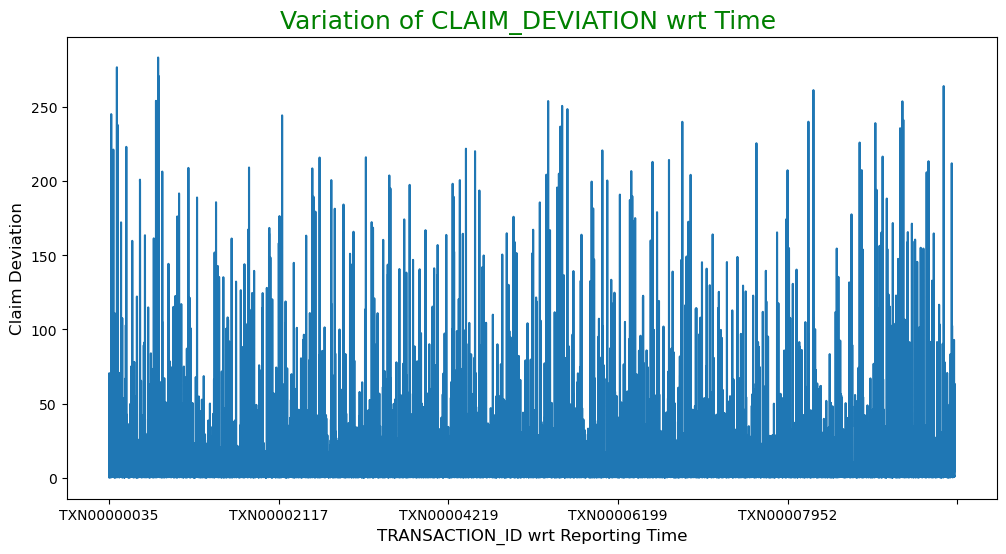

In [57]:
df_ro2['CLAIM_DEVIATION_'].plot(figsize=(12,6))
plt.title("Variation of CLAIM_DEVIATION wrt Time ",size=18,c='g')
plt.ylabel("Claim Deviation",size=12)
plt.xlabel("TRANSACTION_ID wrt Reporting Time",size=12)
plt.show()

In [58]:
df_ro2.iloc[-4500:-1]['REPORT_DT']

TRANSACTION_ID
TXN00005623    2020-12-29
TXN00005606    2020-12-29
TXN00005471    2020-12-30
TXN00005385    2020-12-30
TXN00005570    2020-12-30
                  ...    
TXN00009974    2021-06-27
TXN00009957    2021-06-28
TXN00009980    2021-06-28
TXN00009967    2021-06-28
TXN00009987    2021-06-28
Name: REPORT_DT, Length: 4499, dtype: object

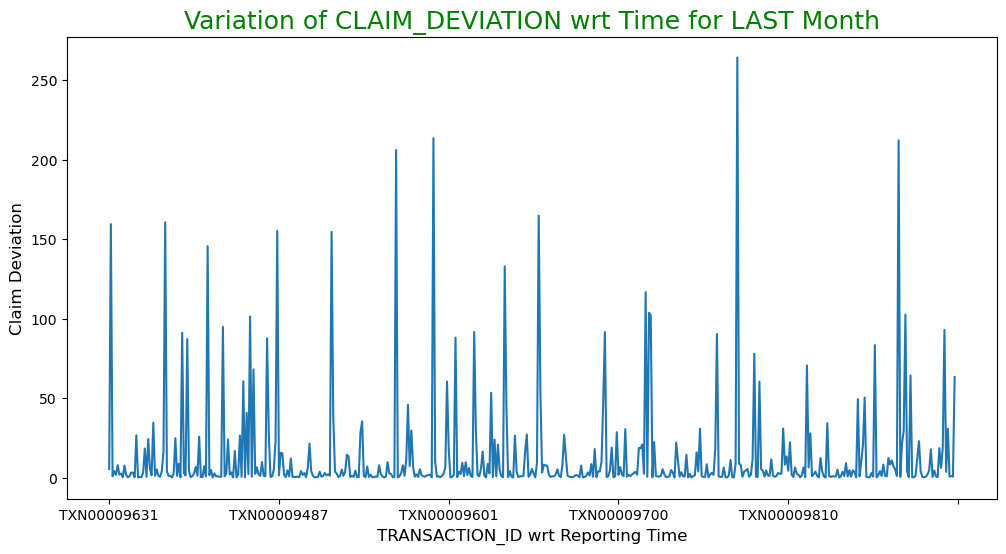

In [59]:
df_ro2.iloc[-500:-1]['CLAIM_DEVIATION_'].plot(figsize=(12,6))
plt.title("Variation of CLAIM_DEVIATION wrt Time for LAST Month",size=18,c='g')
plt.ylabel("Claim Deviation",size=12)
plt.xlabel("TRANSACTION_ID wrt Reporting Time",size=12)
plt.show()

## Avg Claim Amount base on Last 30 Days 

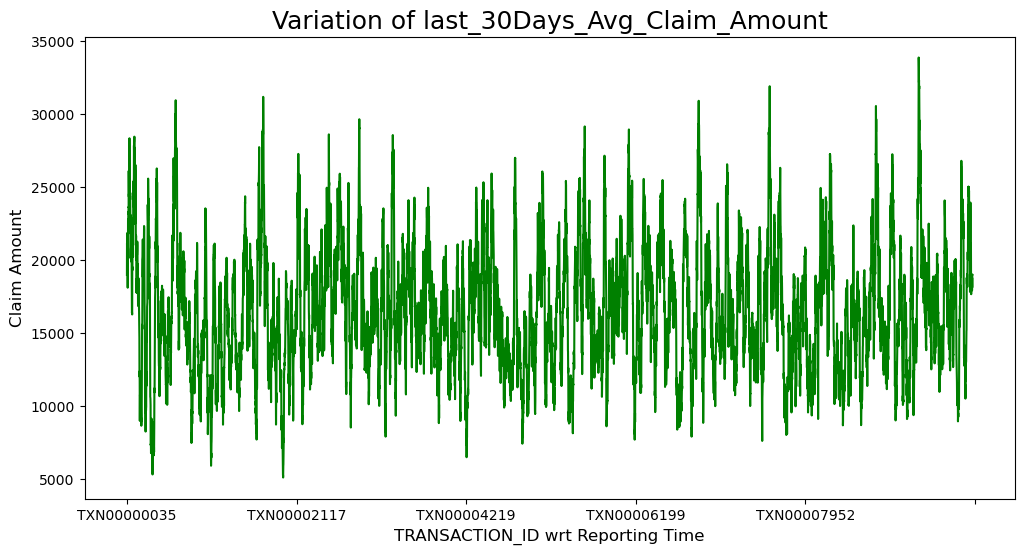

In [60]:
df_ro2[:]['last_30Days_Avg_Claim_Amount'].plot(figsize=(12,6),c='g')
plt.title("Variation of last_30Days_Avg_Claim_Amount",size=18)
plt.ylabel("Claim Amount",size=12)
plt.xlabel("TRANSACTION_ID wrt Reporting Time",size=12)
plt.show()

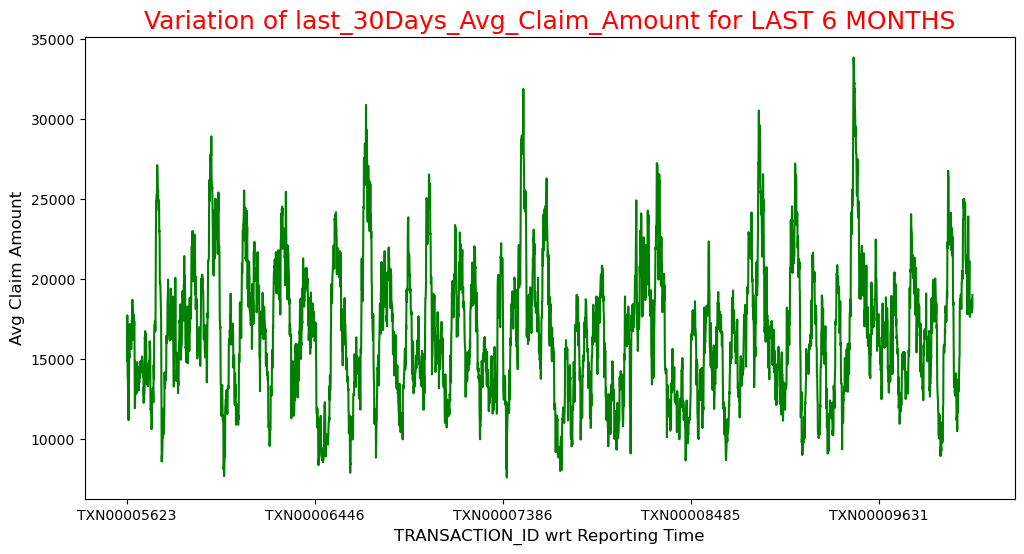

In [61]:
#2020-12-29 to 2021-06-28
df_ro2.iloc[-4500:-1]['last_30Days_Avg_Claim_Amount'].plot(figsize=(12,6),c='g')
plt.title("Variation of last_30Days_Avg_Claim_Amount for LAST 6 MONTHS",size=18,c='r')
plt.ylabel("Avg Claim Amount",size=12)
plt.xlabel("TRANSACTION_ID wrt Reporting Time",size=12)
plt.show()

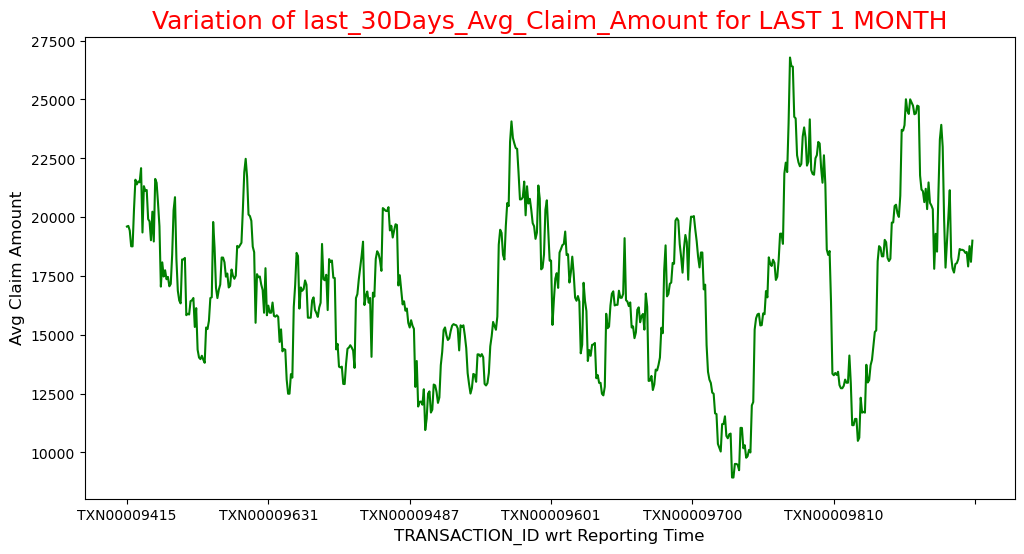

In [62]:
#2021-05-29 to 2021-06-28
df_ro2.iloc[-600:-1]['last_30Days_Avg_Claim_Amount'].plot(figsize=(12,6),c='g')
plt.title("Variation of last_30Days_Avg_Claim_Amount for LAST 1 MONTH",size=18,c='r')
plt.ylabel("Avg Claim Amount",size=12)
plt.xlabel("TRANSACTION_ID wrt Reporting Time",size=12)
plt.show()

### conclusion
* Avg claim amount base on last month was 17k-20k

In [63]:
df_ro2

,TXN_DATE_TIME,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,ADDRESS_LINE2_y,CITY_y,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,COLOCATION,last_30Days_Avg_Claim_Amount,CLAIM_DEVIATION_,CLAIM_DEVIATION_STATUS
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
TXN00000035,2020-06-02 00:00:00,A00007890,PLC00005354,2014-08-13,2020-05-17,2020-05-22,Life,95.16,74000,Charles Johnson,...,NaN,Montgomery,AL,36117,77224084,WQLL86041147288019,0,18966.666667,0.256306,1
TXN00000037,2020-06-02 00:00:00,A00008207,PLC00008260,2017-06-22,2020-05-17,2020-05-22,Mobile,8.27,300,Irene Metcalf,...,D,Louisville,KY,40291,106847442,IYLB01551123255113,0,21133.333333,70.444444,0
TXN00000131,2020-06-05 00:00:00,A00000815,PLC00001203,2013-12-19,2020-05-17,2020-05-22,Mobile,10.39,300,Everett Smudrick,...,NaN,Union City,CA,94587,13296717,BRRW88733394012251,0,20276.666667,67.588889,0
TXN00000020,2020-06-01 00:00:00,A00005314,PLC00001411,2013-11-08,2020-05-17,2020-05-22,Life,77.17,68000,Mary Carmona,...,NaN,Glendale,AZ,85302,73241650,MKKM02244049362842,0,20186.666667,0.296863,1
TXN00000014,2020-06-01 00:00:00,A00007988,PLC00002521,2020-01-29,2020-05-18,2020-05-23,Life,64.16,51000,Felicita Stoughton,...,NaN,Saint Albans City,VT,5478,69952254,TOGM23655710729269,0,20153.333333,0.395163,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXN00009957,2021-06-29 00:00:00,A00009499,PLC00003169,2018-04-09,2021-06-28,2021-06-28,Life,68.20,26000,Alex Jolly,...,NaN,Crownsville,MD,21032,85168310,KDJO86436904919476,0,17903.333333,0.688590,0
TXN00009980,2021-06-30 00:00:00,A00002305,PLC00001801,2012-04-20,2021-06-28,2021-06-28,Health,127.68,18000,Aaron Hernandez,...,#APT 305,Mountain View,CA,94040,54512078,MMVE05499741651584,0,18766.666667,1.042593,0
TXN00009967,2021-06-29 00:00:00,A00005596,PLC00000157,2014-03-04,2021-06-28,2021-06-28,Property,147.42,28000,Dottie King,...,NaN,Fayetteville,AR,72704,68285980,XMCG40879190513403,0,18100.000000,0.646429,0


In [64]:
df_ro2[['CLAIM_DEVIATION_STATUS','CLAIM_DEVIATION_','last_30Days_Avg_Claim_Amount','CLAIM_AMOUNT']].describe().round(2).style.background_gradient(cmap='gnuplot2_r').set_precision(2)

,CLAIM_DEVIATION_STATUS,CLAIM_DEVIATION_,last_30Days_Avg_Claim_Amount,CLAIM_AMOUNT
count,9970.00,9970.00,9970.00,9970.00
mean,0.17,12.89,16561.26,16556.60
std,0.37,29.65,4253.86,22044.46
min,0.00,0.08,5090.00,100.00
25%,0.00,0.73,13494.17,2000.00
50%,0.00,2.15,16281.67,7000.00
75%,0.00,8.73,19225.83,21000.00
max,1.00,283.40,33853.33,100000.00


In [65]:
df_ro1.groupby("REPORT_DT")['CLAIM_AMOUNT'].sum()

REPORT_DT
2020-05-17      9000
2020-05-18    137400
2020-05-19    172000
2020-05-20     36600
2020-05-21    109000
               ...  
2021-06-25    326000
2021-06-26     43000
2021-06-27     77800
2021-06-28     72300
2021-06-29       600
Name: CLAIM_AMOUNT, Length: 409, dtype: int64

In [66]:
idx=df_ro1.groupby("REPORT_DT")['CLAIM_AMOUNT'].sum().index
val=df_ro1.groupby("REPORT_DT")['CLAIM_AMOUNT'].sum().values
df_new1=pd.DataFrame({"DATE":idx,"TOTAL_CLAIM_AMOUNT":val})
df_new1

,DATE,TOTAL_CLAIM_AMOUNT
0,2020-05-17,9000
1,2020-05-18,137400
2,2020-05-19,172000
3,2020-05-20,36600
4,2020-05-21,109000
...,...,...
404,2021-06-25,326000
405,2021-06-26,43000
406,2021-06-27,77800
407,2021-06-28,72300


In [67]:
df_new1['last_30Days_Avg_Claim_Amount']=df_new1['TOTAL_CLAIM_AMOUNT'].rolling(30).mean().shift(1)
df_new1['last_3Days_Avg_Claim_Amount']=df_new1['TOTAL_CLAIM_AMOUNT'].rolling(3).mean().shift(1)
df_new1=df_new1[30:]
df_new1

,DATE,TOTAL_CLAIM_AMOUNT,last_30Days_Avg_Claim_Amount,last_3Days_Avg_Claim_Amount
30,2020-06-16,768600,337866.666667,580300.000000
31,2020-06-17,427400,363186.666667,669033.333333
32,2020-06-18,550400,372853.333333,673766.666667
33,2020-06-19,534900,385466.666667,582133.333333
34,2020-06-20,370700,402076.666667,504233.333333
...,...,...,...,...
404,2021-06-25,326000,417696.666667,351266.666667
405,2021-06-26,43000,407686.666667,292866.666667
406,2021-06-27,77800,397333.333333,161766.666667
407,2021-06-28,72300,383946.666667,148933.333333


In [68]:
df_new1=df_new1.set_index('DATE')

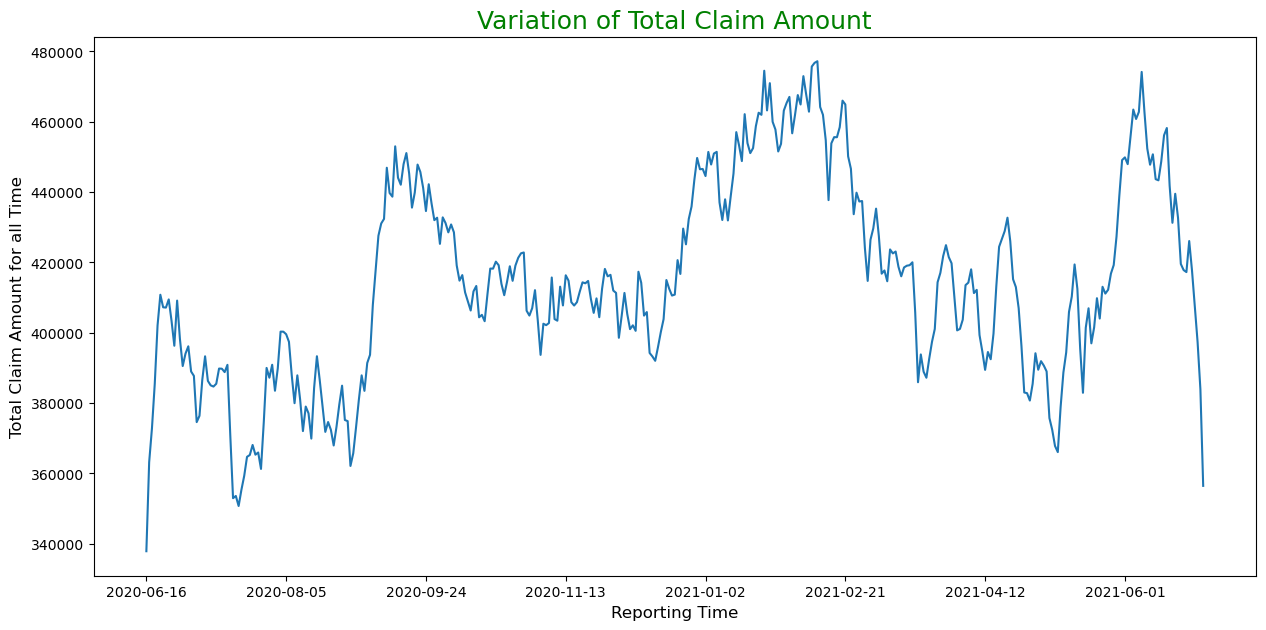

In [69]:
plt.figure(figsize=(15,7))
df_new1['last_30Days_Avg_Claim_Amount'].plot()
plt.title("Variation of Total Claim Amount",size=18,c='g')
plt.ylabel("Total Claim Amount for all Time",size=12)
plt.xlabel("Reporting Time",size=12)
plt.show()

In [70]:
df_new1[['last_30Days_Avg_Claim_Amount','TOTAL_CLAIM_AMOUNT','last_3Days_Avg_Claim_Amount']].describe().round(2).style.background_gradient().highlight_min(axis=0, color='lightblue').highlight_max(axis=0, color='blue')

,last_30Days_Avg_Claim_Amount,TOTAL_CLAIM_AMOUNT,last_3Days_Avg_Claim_Amount
count,379.000000,379.000000,379.000000
mean,414834.970000,410296.310000,413445.380000
std,28199.060000,158133.100000,95861.600000
min,337866.670000,600.000000,64366.670000
25%,394206.670000,292050.000000,345500.000000
50%,413100.000000,409600.000000,410433.330000
75%,435438.330000,501650.000000,480350.000000
max,477216.670000,897100.000000,673766.670000


### conclsuion :
* Totalclaim amount rapidly decreases on june 2021 and also same between periods of feb 2021 to middle of march 2021
* Avg claim amount was same for 3days and 30 days moving avg methods

# Task 7

### All Agents worked on more than 2 Insurance Claims

In [71]:
df3=df.groupby(['AGENT_ID','INSURANCE_TYPE'])['CLAIM_AMOUNT'].min()

In [72]:
df.groupby(['AGENT_ID','INSURANCE_TYPE'])['CLAIM_AMOUNT'].min()

AGENT_ID    INSURANCE_TYPE
AGENT00001  Mobile              100
            Motor              2000
            Property          19000
            Travel             3000
AGENT00002  Life              79000
                              ...  
AGENT01200  Life              10000
            Mobile              400
            Motor              4000
            Property          10000
            Travel             2000
Name: CLAIM_AMOUNT, Length: 5464, dtype: int64

In [73]:
l=[]
agent_list=df['AGENT_ID'].unique()
for i,v in enumerate(agent_list):
    d=df[(df['AGENT_ID']==v)&(df['CLAIM_STATUS']=='A')]
    if len(d['INSURANCE_TYPE'].unique())>2:
        l.append(v)
    else:
        continue 

In [74]:
len(l)

1154

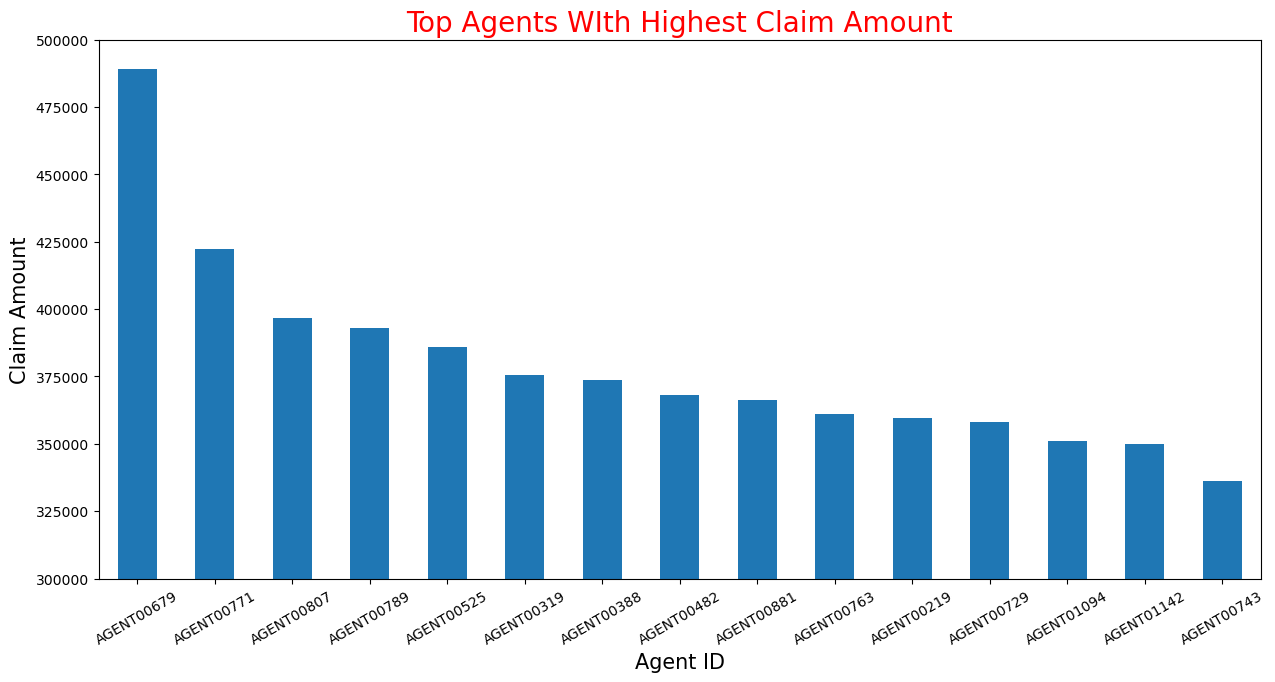

In [75]:
df4=df[df['AGENT_ID'].isin(l)]
df4=df4[df4['CLAIM_STATUS']=='A']
plt.figure(figsize=(15,7))
df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=False)[:15].plot(kind='bar')
plt.xticks(rotation=30)
plt.ylim(300000,500000)
plt.ylabel("Claim Amount",size=15)
plt.xlabel("Agent ID",size=15)
plt.title("Top Agents WIth Highest Claim Amount",size=20,c='r')
plt.show()

In [76]:
df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=False)[:5]

AGENT_ID
AGENT00679    489000
AGENT00771    422100
AGENT00807    396800
AGENT00789    392900
AGENT00525    385900
Name: CLAIM_AMOUNT, dtype: int64

### conclusion
* There are total **1164** Agents those worked on more than 2 types of Insurance Claims 
* There is **only one Agent (ID-AGENT00807)** whos customers claims sum is **aournd 5 lakh** 
* There are total **12-15 Agents** with **more than 3.5 lakh Total Claim amount** 

# Task 8

In [77]:
df['INSURANCE_TYPE'].unique()

array(['Health', 'Property', 'Travel', 'Life', 'Motor', 'Mobile'],
      dtype=object)

In [78]:
df['AGENT_ID'].unique()

array(['AGENT00413', 'AGENT00769', 'AGENT00883', ..., 'AGENT00371',
       'AGENT00415', 'AGENT01161'], dtype=object)

In [79]:
df['Updated_Preminum_Amount']=np.nan
df['Perc_Change']=np.nan

In [80]:
for i,v in enumerate(df['INSURANCE_TYPE']):
    if v=='Mobile' or v=='Travel':
        df.loc[i,'Updated_Preminum_Amount']=df.loc[i,'PREMIUM_AMOUNT']*0.9
        df.loc[i,'Perc_Change']=(df.loc[i,'Updated_Preminum_Amount']-df.loc[i,'PREMIUM_AMOUNT'])/(df.loc[i,'PREMIUM_AMOUNT'])
    elif v=='Health' or v=='Property':
        df.loc[i,'Updated_Preminum_Amount']=df.loc[i,'PREMIUM_AMOUNT']*1.07
        df.loc[i,'Perc_Change']=(df.loc[i,'Updated_Preminum_Amount']-df.loc[i,'PREMIUM_AMOUNT'])/(df.loc[i,'PREMIUM_AMOUNT'])
    elif v=='Life' or v=='Motor':
        df.loc[i,'Updated_Preminum_Amount']=df.loc[i,'PREMIUM_AMOUNT']*1.02
        df.loc[i,'Perc_Change']=(df.loc[i,'Updated_Preminum_Amount']-df.loc[i,'PREMIUM_AMOUNT'])/(df.loc[i,'PREMIUM_AMOUNT'])
    else :
        df.loc[i,'Updated_Preminum_Amount']=np.nan

df['Updated_Preminum_Amount']=df['Updated_Preminum_Amount'].round(2)
df['Perc_Change']=df['Perc_Change']*100
df['Perc_Change']=df['Perc_Change'].round(4)

In [81]:
df['PREMIUM_AMOUNT']

0       157.13
1       141.71
2       157.24
3       172.87
4        88.53
         ...  
9995    105.75
9996     64.59
9997    183.50
9998    113.46
9999      8.22
Name: PREMIUM_AMOUNT, Length: 10000, dtype: float64

In [82]:
df['Updated_Preminum_Amount']

0       168.13
1       151.63
2       168.25
3       184.97
4        79.68
         ...  
9995    107.86
9996     65.88
9997    196.34
9998    115.73
9999      7.40
Name: Updated_Preminum_Amount, Length: 10000, dtype: float64

In [83]:
df['Perc_Change']

0        7.0
1        7.0
2        7.0
3        7.0
4      -10.0
        ... 
9995     2.0
9996     2.0
9997     7.0
9998     2.0
9999   -10.0
Name: Perc_Change, Length: 10000, dtype: float64

In [84]:
df['CUSTOMER_ID'].nunique()

10000

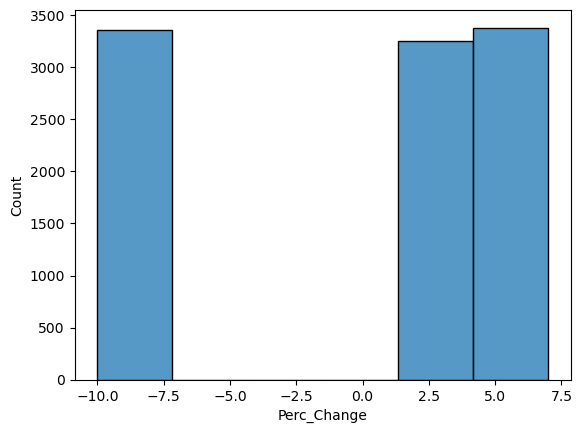

In [85]:
sns.histplot(data=df,x=df['Perc_Change'],bins=6)
plt.show()

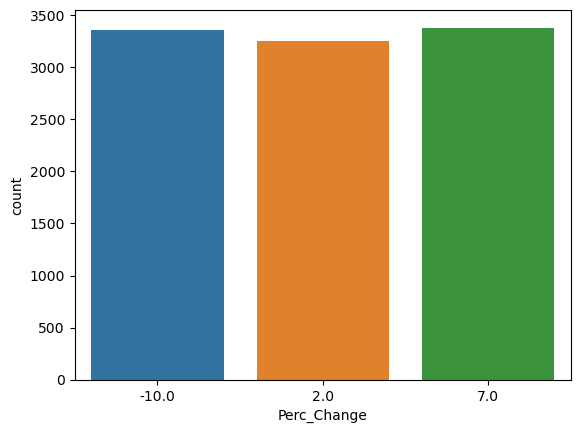

In [86]:
sns.countplot(data=df,x=df['Perc_Change'])
plt.show()

In [87]:
df['Perc_Change'].value_counts()

 7.0     3382
-10.0    3362
 2.0     3256
Name: Perc_Change, dtype: int64

### conclusion
* Negative per means there is decresese in Preminum_Amount due to discount provided for Mobile & Travel Insurance premium

# Task 9

* Business wants to give discount to customer who are loyal and under stress due to Covid
* IF CUSTOMER_TENURE > 60 AND EMPLOYMENT_STATUS = “N” AND NO_OF_FAMILY_MEMBERS >=4 THEN 1 ELSE 0

In [88]:
df.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1_x',
       'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'COLOCATION',
       'Updated_Preminum_Amount', 'Perc_Change'],
      dtype='object')

In [89]:
df['EMPLOYMENT_STATUS'].value_counts()

Y    9171
N     829
Name: EMPLOYMENT_STATUS, dtype: int64

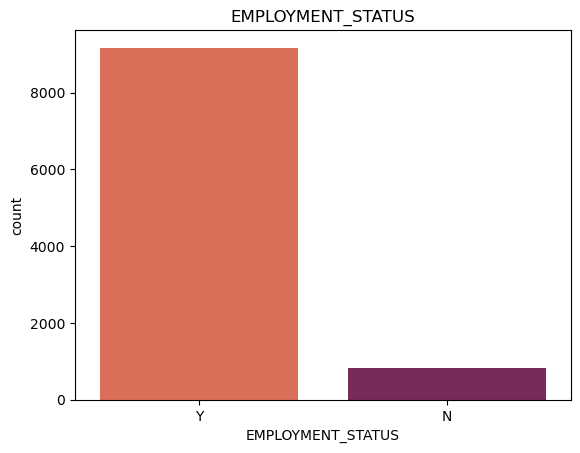

In [90]:
sns.countplot(data=df,x='EMPLOYMENT_STATUS',palette='rocket_r')
plt.title("EMPLOYMENT_STATUS")
plt.show()

In [91]:
len(df[(df['TENURE']>60)&(df['EMPLOYMENT_STATUS']=='N')&(df['NO_OF_FAMILY_MEMBERS']>3)].index)

299

In [92]:
df['ELIGIBLE_FOR_DISCOUNT']=np.where(((df['TENURE']>60)&(df['EMPLOYMENT_STATUS']=='N')&(df['NO_OF_FAMILY_MEMBERS']>3)),1,0)

In [93]:
np.round(df['ELIGIBLE_FOR_DISCOUNT'].mean()*100,2)

2.99

In [94]:
df[(df['TENURE']>60)&(df['EMPLOYMENT_STATUS']=='N')&(df['NO_OF_FAMILY_MEMBERS']>3)][['CUSTOMER_ID','TENURE']].sort_values("TENURE",ascending=False)[:100]

,CUSTOMER_ID,TENURE
1094,A00001700,119
7404,A00006403,119
589,A00006309,119
7895,A00006074,119
7979,A00004625,119
...,...,...
507,A00004169,100
8541,A00004595,100
9368,A00003090,100
8973,A00004038,100


In [95]:
df['ELIGIBLE_FOR_DISCOUNT'].mean()

0.0299

In [96]:
df[df['ELIGIBLE_FOR_DISCOUNT']==1]['CUSTOMER_ID']

23      A00001719
53      A00000859
62      A00002702
68      A00007027
102     A00009946
          ...    
9751    A00007441
9859    A00004910
9875    A00001213
9929    A00002804
9974    A00006567
Name: CUSTOMER_ID, Length: 299, dtype: object

### conclusion
* Ther are **299 customers (i.e 3% of customers)** are eligible for above discount
* Out off 299  there are **100 customers with TENURE more than 100**

## Task 10

In [97]:
df5=df.sort_values('REPORT_DT')
df5

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,ADDRESS_LINE2_y,CITY_y,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,COLOCATION,Updated_Preminum_Amount,Perc_Change,ELIGIBLE_FOR_DISCOUNT
15,2020-06-01 00:00:00,TXN00000016,A00008033,PLC00008152,2011-01-25,2020-05-12,2020-05-17,Motor,128.73,9000,...,#B4,Mammoth Lakes,CA,93546,28869605,NSVP36826783847299,0,131.30,2.0,0
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,#1,Glendale,AZ,85301,44055451,XBYG14382904542874,0,151.63,7.0,0
6,2020-06-01 00:00:00,TXN00000007,A00007245,PLC00002796,2012-10-26,2020-05-13,2020-05-18,Health,197.23,3000,...,NaN,East Longmeadow,MA,1028,29678921,FBBJ92261917454231,0,211.04,7.0,0
35,2020-06-02 00:00:00,TXN00000036,A00003536,PLC00003499,2013-02-14,2020-05-13,2020-05-18,Life,66.73,69000,...,NaN,Panama City Beach,FL,32408,35997418,FTOT36944483714748,0,68.06,2.0,0
50,2020-06-02 00:00:00,TXN00000051,A00002074,PLC00003805,2015-03-15,2020-05-13,2020-05-18,Mobile,11.04,400,...,NaN,Washington,DC,20016,17970178,QETK08575748855967,0,9.94,-10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,2021-06-29 00:00:00,TXN00009957,A00009499,PLC00003169,2018-04-09,2021-06-28,2021-06-28,Life,68.20,26000,...,NaN,Crownsville,MD,21032,85168310,KDJO86436904919476,0,69.56,2.0,0
9979,2021-06-30 00:00:00,TXN00009980,A00002305,PLC00001801,2012-04-20,2021-06-28,2021-06-28,Health,127.68,18000,...,#APT 305,Mountain View,CA,94040,54512078,MMVE05499741651584,0,136.62,7.0,0
9966,2021-06-29 00:00:00,TXN00009967,A00005596,PLC00000157,2014-03-04,2021-06-28,2021-06-28,Property,147.42,28000,...,NaN,Fayetteville,AR,72704,68285980,XMCG40879190513403,0,157.74,7.0,0
9986,2021-06-30 00:00:00,TXN00009987,A00001625,PLC00000559,2014-11-17,2021-06-28,2021-06-28,Mobile,6.89,300,...,NaN,Manchester,CT,6042,91036517,DQEH00142970374186,0,6.20,-10.0,0


In [98]:
df5.groupby('REPORT_DT').count()['TXN_DATE_TIME'].values

array([ 1,  5,  7,  6,  7,  8, 12, 11, 19, 20, 13, 22, 23, 20, 29, 30, 21,
       27, 16, 29, 22, 26, 25, 19, 35, 21, 22, 31, 25, 36, 26, 30, 30, 25,
       25, 11, 22, 18, 24, 23, 39, 16, 23, 22, 16, 23, 23, 26, 22, 23, 34,
       27, 31, 25, 27, 27, 24, 26, 27, 20, 22, 34, 25, 33, 24, 20, 16, 25,
       17, 24, 22, 27, 24, 19, 19, 23, 28, 32, 20, 29, 22, 25, 23, 27, 20,
       17, 25, 31, 21, 26, 25, 25, 19, 20, 27, 20, 18, 29, 20, 25, 24, 26,
       19, 19, 28, 22, 31, 28, 23, 26, 30, 25, 24, 33, 25, 35, 16, 25, 31,
       18, 23, 28, 24, 24, 15, 25, 27, 23, 17, 24, 26, 20, 19, 21, 26, 31,
       26, 28, 33, 31, 19, 31, 18, 22, 24, 22, 24, 27, 33, 23, 24, 28, 25,
       22, 20, 19, 23, 30, 22, 21, 21, 31, 22, 30, 25, 23, 23, 36, 33, 23,
       21, 31, 29, 28, 28, 17, 21, 33, 19, 31, 24, 24, 21, 19, 28, 24, 23,
       20, 21, 18, 39, 32, 28, 25, 24, 20, 32, 28, 27, 27, 24, 24, 29, 25,
       33, 26, 28, 28, 18, 25, 23, 30, 31, 30, 29, 37, 23, 22, 24, 27, 26,
       30, 26, 28, 26, 23

In [99]:
df5.groupby('REPORT_DT').count()['TXN_DATE_TIME'].index

Index(['2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       ...
       '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
       '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29'],
      dtype='object', name='REPORT_DT', length=409)

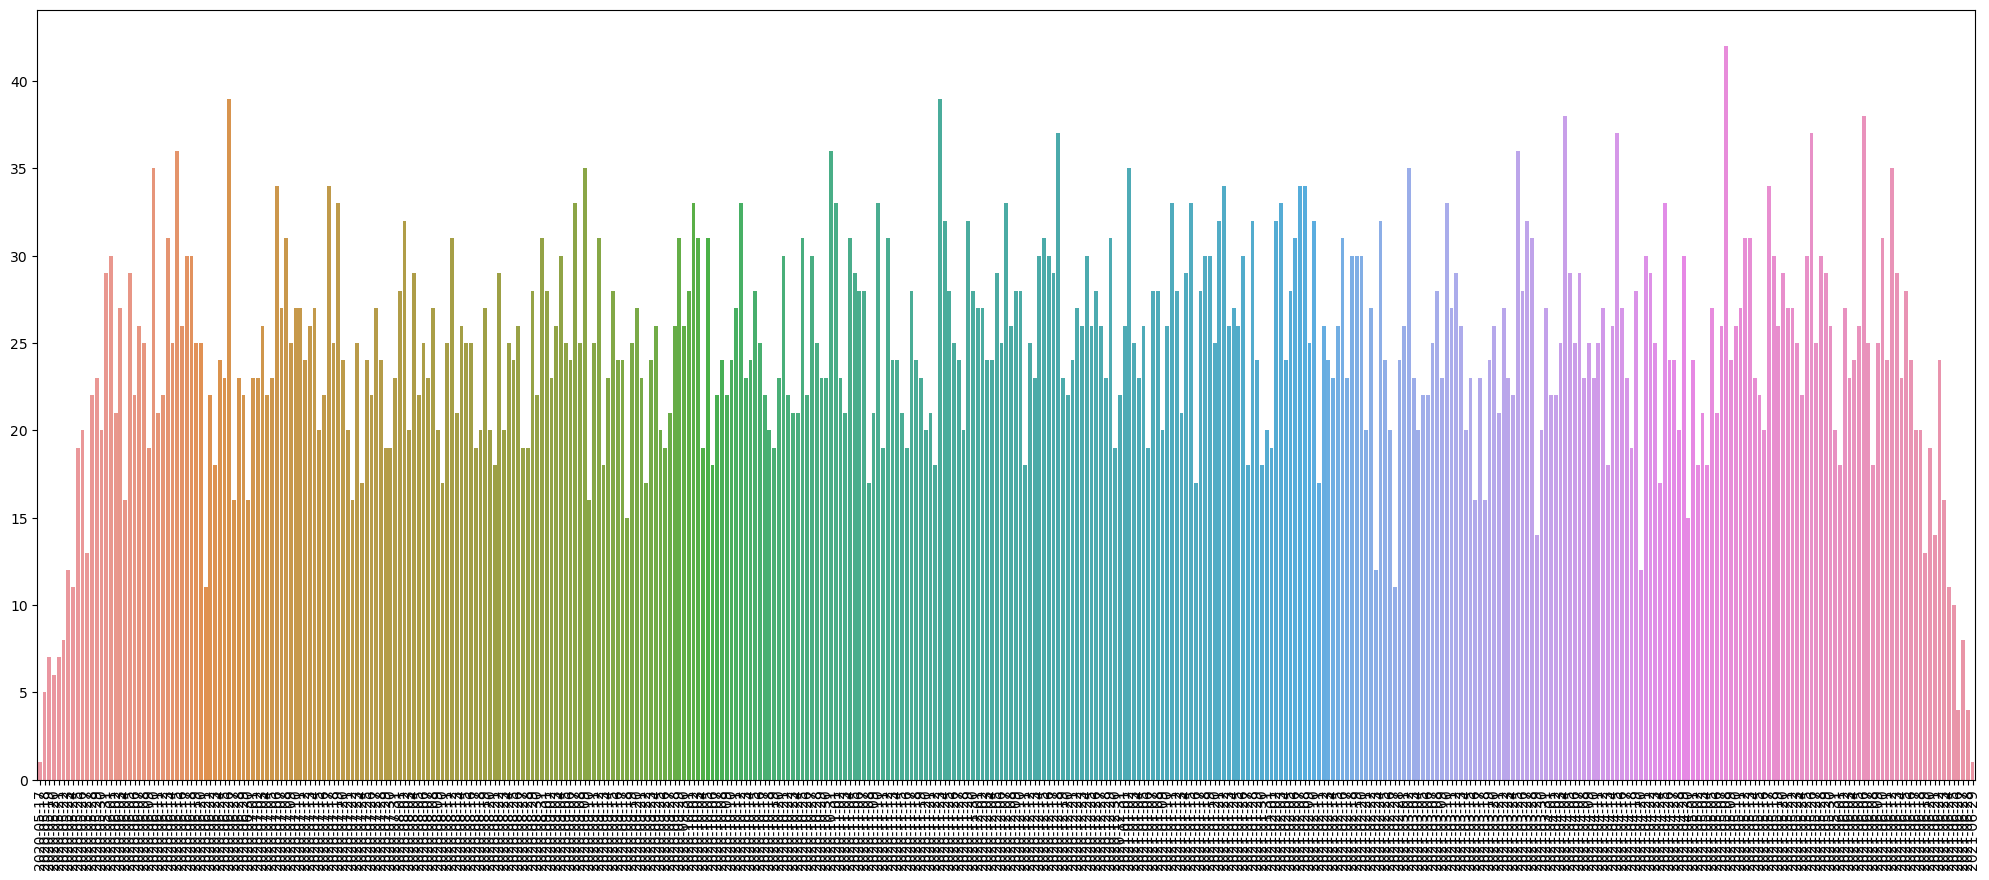

In [100]:
plt.figure(figsize=(25,10))
sns.barplot(x=list(df5.groupby('REPORT_DT').count()['TXN_DATE_TIME'].index),y=list(df5.groupby('REPORT_DT').count()['TXN_DATE_TIME'].values),data=df5)
plt.xticks(rotation=90)
plt.show()

In [101]:
df6=df5.groupby('REPORT_DT').count().reset_index()
df6=df6.iloc[:,:2]
df6=df6.rename(columns={'TXN_DATE_TIME':'No_of_Claim','REPORT_DT':'DATE'})
df6

,DATE,No_of_Claim
0,2020-05-17,1
1,2020-05-18,5
2,2020-05-19,7
3,2020-05-20,6
4,2020-05-21,7
...,...,...
404,2021-06-25,10
405,2021-06-26,4
406,2021-06-27,8
407,2021-06-28,4


## Total No of Claims

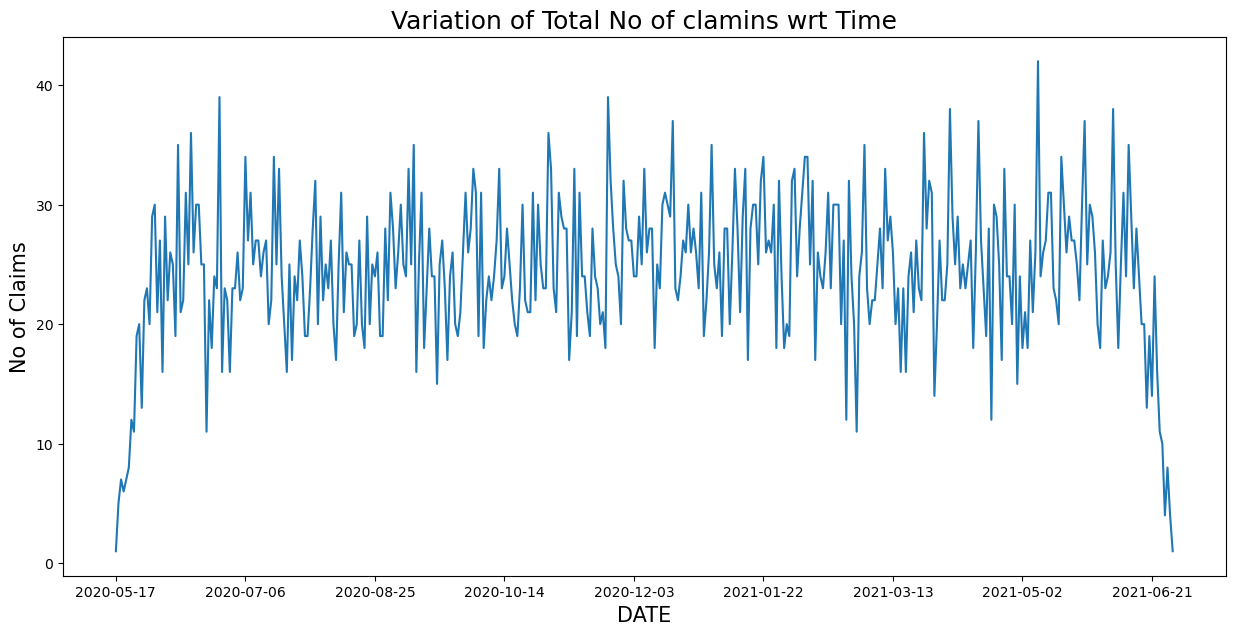

In [102]:
df6.set_index('DATE')['No_of_Claim'].plot(figsize=(15,7))

plt.title("Variation of Total No of clamins wrt Time",size=18)
plt.ylabel("No of Claims",size=15)
plt.xlabel("DATE",size=15)
plt.show()

In [103]:
df7=df6.set_index('DATE')
df7

,No_of_Claim
DATE,
2020-05-17,1
2020-05-18,5
2020-05-19,7
2020-05-20,6
2020-05-21,7
...,...
2021-06-25,10
2021-06-26,4
2021-06-27,8


In [104]:
df7['last_3Days_Claims']=df7['No_of_Claim'].rolling(3).sum().shift(1)
df7['last_30Days_Claims']=df7['No_of_Claim'].rolling(30).sum().shift(1)
df7=df7.dropna()
df7['CLAIM_VELOCITY']=df7['last_30Days_Claims']/df7['last_3Days_Claims']
df7

,No_of_Claim,last_3Days_Claims,last_30Days_Claims,CLAIM_VELOCITY
DATE,,,,
2020-06-16,26,92.0,588.0,6.391304
2020-06-17,30,87.0,613.0,7.045977
2020-06-18,30,92.0,638.0,6.934783
2020-06-19,25,86.0,661.0,7.686047
2020-06-20,25,85.0,680.0,8.000000
...,...,...,...,...
2021-06-25,10,51.0,722.0,14.156863
2021-06-26,4,37.0,695.0,18.783784
2021-06-27,8,25.0,674.0,26.960000


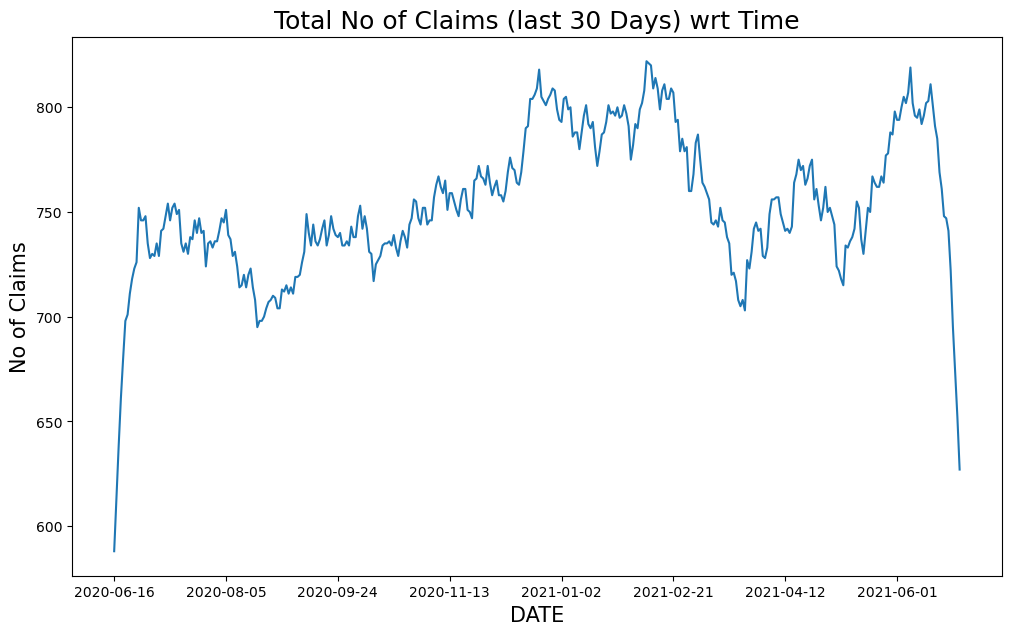

In [105]:
df7['last_30Days_Claims'].plot(figsize=(12,7))

plt.title("Total No of Claims (last 30 Days) wrt Time",size=18)
plt.ylabel("No of Claims",size=15)
plt.xlabel("DATE",size=15)
plt.show()

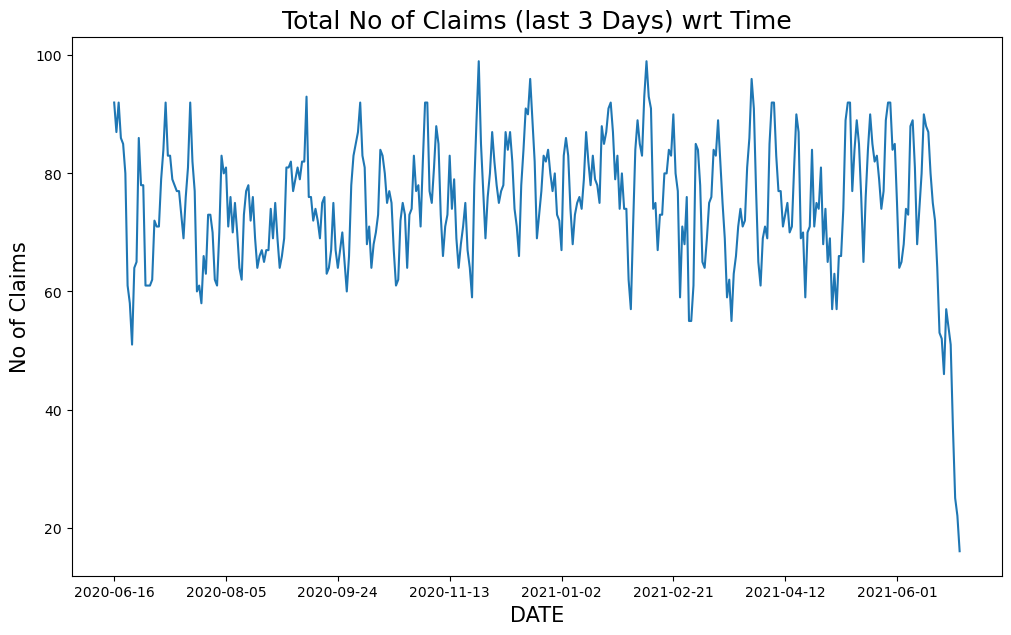

In [106]:
df7['last_3Days_Claims'].plot(figsize=(12,7))
plt.title("Total No of Claims (last 3 Days) wrt Time",size=18)
plt.ylabel("No of Claims",size=15)
plt.xlabel("DATE",size=15)
plt.show()

### conclsuion:
* No of claims on June 2021 get rapdily reduces from 85 to 25 
* Also on middle of jan 2021 to march its was reduces with decline curve

## Variation of CLAIM_VELOCITY

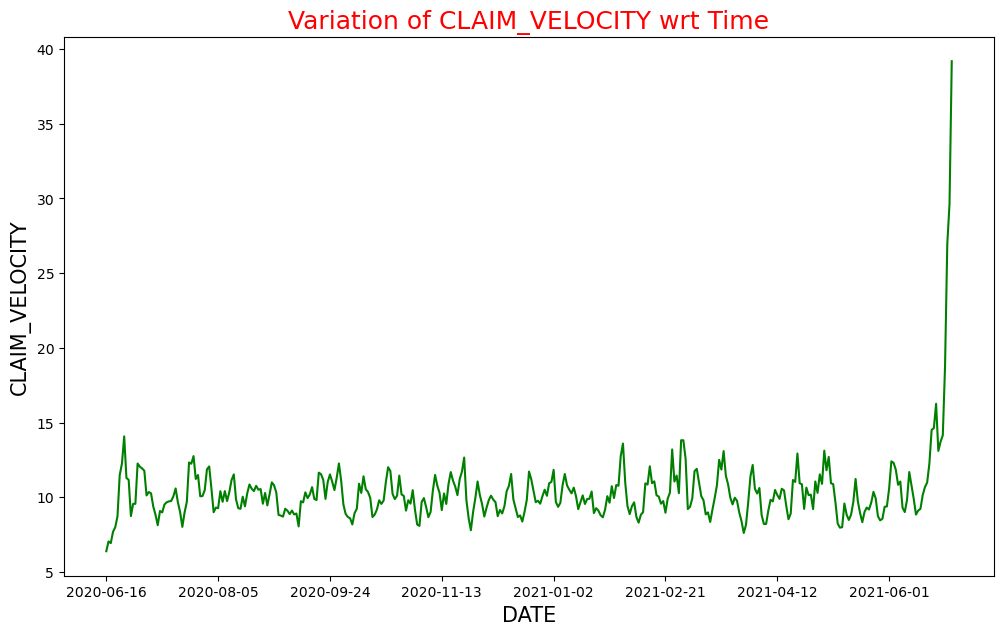

In [107]:
df7['CLAIM_VELOCITY'].plot(figsize=(12,7),c='g')
plt.title("Variation of CLAIM_VELOCITY wrt Time",size=18,c='r')
plt.ylabel("CLAIM_VELOCITY",size=15)
plt.xlabel("DATE",size=15)
plt.show()

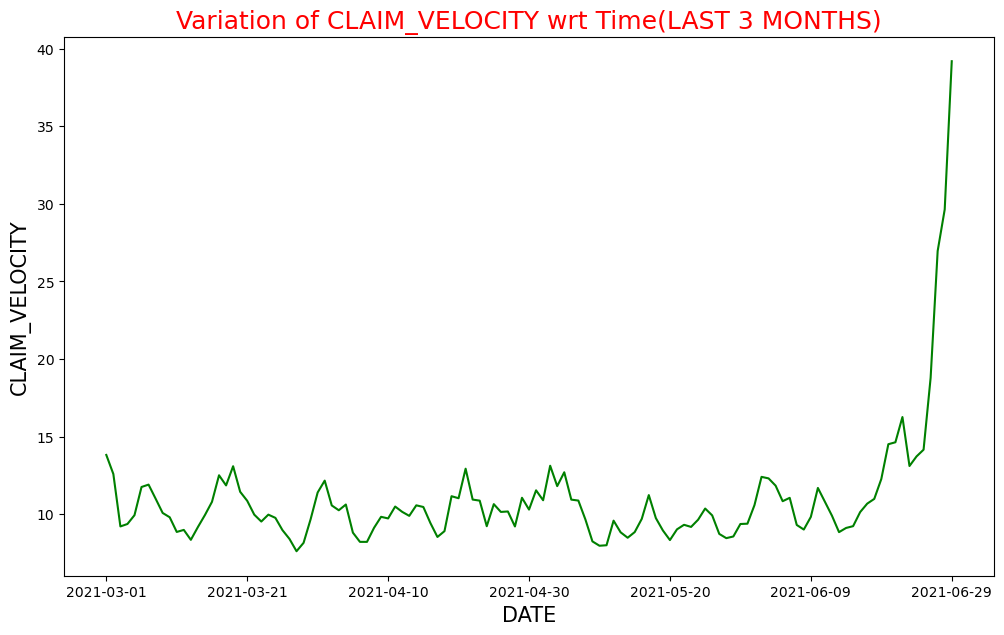

In [108]:
df7.loc['2021-03-01':]['CLAIM_VELOCITY'].plot(figsize=(12,7),c='g')
plt.title("Variation of CLAIM_VELOCITY wrt Time(LAST 3 MONTHS)",size=18,c='r')
plt.ylabel("CLAIM_VELOCITY",size=15)
plt.xlabel("DATE",size=15)
plt.show()

### conclusion
* The claim velocity get rapidly icreases from middle of June 2021

# Task 11

In [109]:
df4

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1_y,ADDRESS_LINE2_y,CITY_y,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,COLOCATION
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,Amy Wangler,1994-01-06,584 Rural Hill Road,NaN,Nashville,TN,37217,35441155,LRZO53254369804934,0
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,Jessica Montez,2004-05-28,6114 West Glenn Drive,#1,Glendale,AZ,85301,44055451,XBYG14382904542874,0
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,Howard Smith,2004-08-01,2500 Snowdoun Chambers Road,NaN,Montgomery,AL,36105,55770246,WRXH14597428306333,0
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,Patricia Tucker,2007-06-12,313 Lone Oak Drive,NaN,Norman,OK,73071,87652976,YEPN16077902472499,0
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,Brenda Bean,2010-01-19,120 Wells Avenue,NaN,Glen Burnie,MD,21061,76119019,HZBK86544578578547,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,...,Melissa Scott,1990-10-12,2723 East Joyce Boulevard,NaN,Fayetteville,AR,72703,35413882,LFOJ76068590051807,0
9996,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,...,Freda Dudley,2013-01-17,1363 Dean Forest Road,NaN,Savannah,GA,31405,91206790,AHEF60771774635030,0
9997,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,...,Victor Perrin,1993-02-11,9912 Shirewick Way,NaN,Louisville,KY,40272,115241097,WREH18805592939657,0
9998,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,...,Maria Lynn,2010-04-16,302 East Granada Street,NaN,Fayetteville,AR,72703,13995380,AAZI21883736448048,0


In [110]:
df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=False)

AGENT_ID
AGENT00679    489000
AGENT00771    422100
AGENT00807    396800
AGENT00789    392900
AGENT00525    385900
               ...  
AGENT00732     11300
AGENT00885     11000
AGENT00706     10800
AGENT00571      7500
AGENT00604      5500
Name: CLAIM_AMOUNT, Length: 1154, dtype: int64

In [111]:
df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=True)

AGENT_ID
AGENT00604      5500
AGENT00571      7500
AGENT00706     10800
AGENT00885     11000
AGENT00732     11300
               ...  
AGENT00525    385900
AGENT00789    392900
AGENT00807    396800
AGENT00771    422100
AGENT00679    489000
Name: CLAIM_AMOUNT, Length: 1154, dtype: int64

In [112]:
i=df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=True).index
v=df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=True).values

In [113]:
df_temp2=pd.DataFrame({"ID":i,"CLAIM_AMOUNT":v})
df_temp2

,ID,CLAIM_AMOUNT
0,AGENT00604,5500
1,AGENT00571,7500
2,AGENT00706,10800
3,AGENT00885,11000
4,AGENT00732,11300
...,...,...
1149,AGENT00525,385900
1150,AGENT00789,392900
1151,AGENT00807,396800
1152,AGENT00771,422100


### Top Agents with lowest Claim amount base on 5 percentile criteria

In [114]:
np.quantile(df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=True),0.05)

30530.0

In [115]:
df_temp2[df_temp2['CLAIM_AMOUNT']<36405.0].shape

(74, 2)

In [116]:
75/df['AGENT_ID'].nunique()*100

6.25

### Top Agents with Highest Claim amount base on 5 percentile criteria

In [117]:
np.quantile(df4.groupby(['AGENT_ID'])['CLAIM_AMOUNT'].sum().sort_values(ascending=False),0.95)

274419.9999999999

In [118]:
df_temp2[df_temp2['CLAIM_AMOUNT']>274419].shape

(58, 2)

In [119]:
59/df['AGENT_ID'].nunique()*100

4.916666666666666

In [120]:
df_low_per_agents=df_temp2[df_temp2['CLAIM_AMOUNT']<36405.0]
df_low_per_agents.shape

(74, 2)

In [121]:
df_low_per_agents.head(10)

,ID,CLAIM_AMOUNT
0,AGENT00604,5500
1,AGENT00571,7500
2,AGENT00706,10800
3,AGENT00885,11000
4,AGENT00732,11300
5,AGENT00346,11400
6,AGENT00748,13000
7,AGENT00689,13300
8,AGENT01183,13600
9,AGENT00910,15500


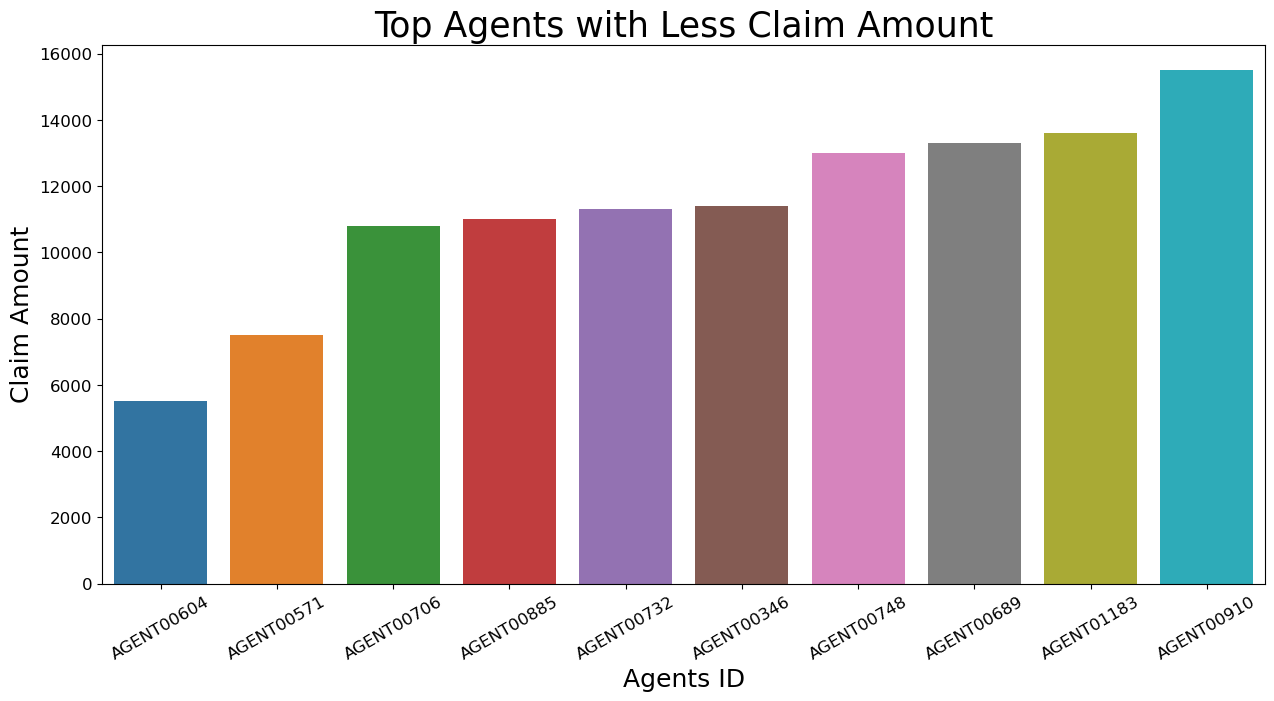

In [122]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_low_per_agents[:10],x='ID',y='CLAIM_AMOUNT')
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.xlabel("Agents ID",size=18)
plt.ylabel("Claim Amount",size=18)
plt.title("Top Agents with Less Claim Amount",size=25)
plt.show()

In [123]:
df_high_per_agents=df_temp2[df_temp2['CLAIM_AMOUNT']>274419].sort_values("CLAIM_AMOUNT",ascending=False)
df_high_per_agents.shape

(58, 2)

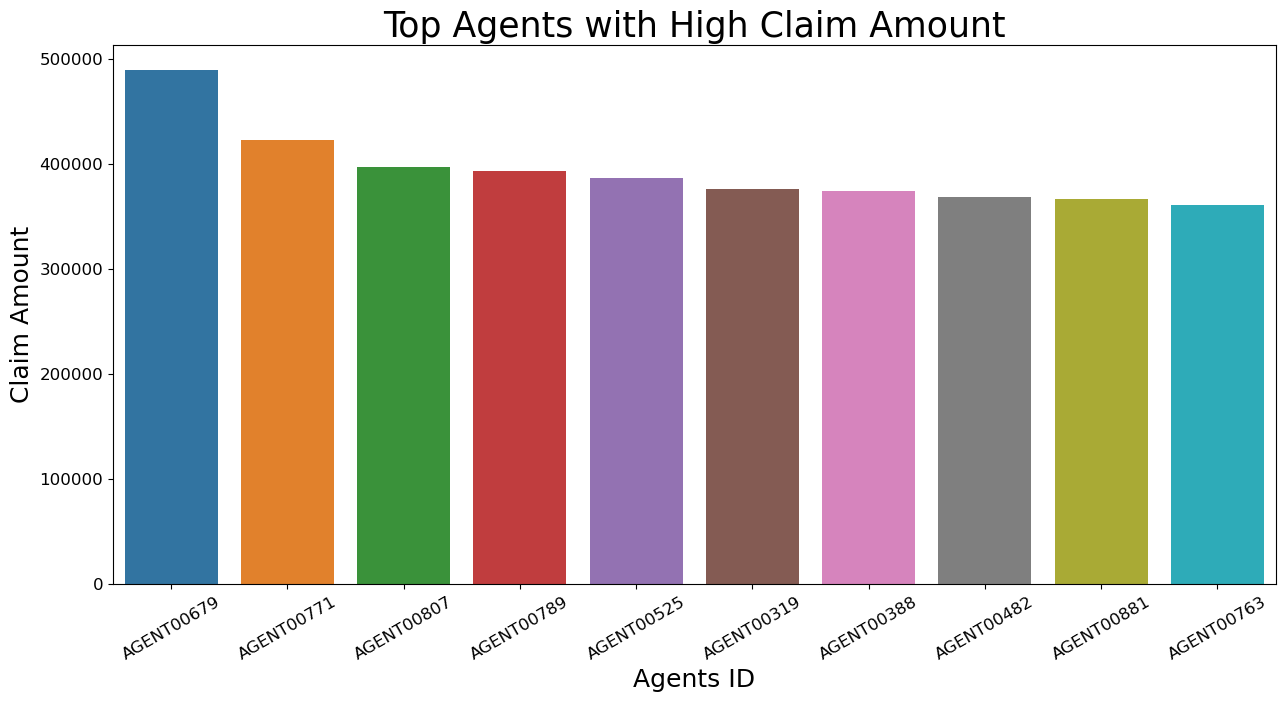

In [124]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_high_per_agents[:10],x='ID',y='CLAIM_AMOUNT')
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.xlabel("Agents ID",size=18)
plt.ylabel("Claim Amount",size=18)
plt.title("Top Agents with High Claim Amount",size=25)
plt.show()

In [125]:
df_low_per_agents['CLAIM_AMOUNT']<=15000

0      True
1      True
2      True
3      True
4      True
      ...  
69    False
70    False
71    False
72    False
73    False
Name: CLAIM_AMOUNT, Length: 74, dtype: bool

In [126]:
df_low_per_agents[df_low_per_agents['CLAIM_AMOUNT']<=15000]

,ID,CLAIM_AMOUNT
0,AGENT00604,5500
1,AGENT00571,7500
2,AGENT00706,10800
3,AGENT00885,11000
4,AGENT00732,11300
5,AGENT00346,11400
6,AGENT00748,13000
7,AGENT00689,13300
8,AGENT01183,13600


In [127]:
df['AGENT_ID'].nunique()

1200

In [128]:
4/1200*100

0.33333333333333337

* there are 7 % employees from all low performing agents those are consider as Suspicious as per the organisatoion rules
* and this prob is very less (0.33) when consider with overall employees

# Task 12

* CLAIM_STATUS = Approved AND 
* CUSTOMER_RISK_SEGMENTATION = High
* AND INCIDENT_SEVERITY = “Major Loss”
* IF TOTAL CLAIM AMOUNT which meet below criteria is >= 15000 

In [129]:
df.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1_x',
       'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x', 'POSTAL_CODE_x', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'COLOCATION',
       'Updated_Preminum_Amount', 'Perc_Change', 'ELIGIBLE_FOR_DISCOUNT'],
      dtype='object')

In [130]:
df['INCIDENT_SEVERITY'].value_counts()

Total Loss    3390
Major Loss    3317
Minor Loss    3293
Name: INCIDENT_SEVERITY, dtype: int64

In [131]:
df_sus1=df[df['INCIDENT_SEVERITY']=='Major Loss']
df_sus2=df_sus1[df_sus1['RISK_SEGMENTATION']=='H']

In [132]:
df_sus3=df_sus2[df_sus2['CLAIM_STATUS']=='A']

In [133]:
df_sus3[df_sus3['CLAIM_AMOUNT']>=15000]['AGENT_ID']

75      AGENT00935
76      AGENT00210
104     AGENT01177
329     AGENT00944
340     AGENT01056
           ...    
9730    AGENT00733
9798    AGENT00765
9802    AGENT01029
9813    AGENT00646
9948    AGENT00853
Name: AGENT_ID, Length: 152, dtype: object

In [134]:
list_Suspicious_agents_id=df_sus3[df_sus3['CLAIM_AMOUNT']>=15000]['AGENT_ID'].tolist()
len(list_Suspicious_agents_id)

152

### conclusion
* there are total **152 employees those satisfied with above business criteria** with **amount greater tha 15k**

### To get Information of Suspicious_agents

In [135]:
df_emp[df_emp['AGENT_ID'].isin(list_Suspicious_agents_id)]

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
10,AGENT00011,Nancy Coronado,2002-01-31,357 Chaplin Street Southeast,NaN,Washington,DC,20019,28574903,CEIG07819775081568
20,AGENT00021,Robert Barnes,1992-08-01,54 Pine Meadow Drive,NaN,Hyde Park,VT,5655,60304500,QBCN62231485753777
42,AGENT00043,Mary Norris,2011-08-07,5073 West 65th Place,NaN,Arvada,CO,80003,93553577,IDSZ07874822883626
...,...,...,...,...,...,...,...,...,...,...
1176,AGENT01177,Jeffrey Merrell,2013-07-10,1622 Orchard Avenue,NaN,Louisville,KY,40213,86511717,DIDX84463472014031
1181,AGENT01182,Micah Tucker,2008-10-02,3377 Sandstone Court,NaN,Pleasanton,CA,94588,75949031,LYFY39514467763614
1183,AGENT01184,James Ayers,2008-11-10,1609 Porter Avenue,NaN,Nashville,TN,37206,53733638,MTDS80945137889409
1187,AGENT01188,Kenneth Bullard,2009-05-15,9399 Yucca Way,NaN,Arvada,CO,80007,45452985,YEAW55756362400588
